# Entrega 2

|                |   |
:----------------|---|
| **Expediente**     | **Nombre**  |
| 750733 | Sara Hernández Ochoa  |
| 741902 | Michelle Gómez López |


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch


In [8]:
tickers = ['DLR','JCI','PFE','COST','JPM']


In [9]:
prices = yf.download(tickers, start='2018-01-01', end='2025-09-11')['Close']
prices

C:\Users\miche\AppData\Local\Temp\ipykernel_15152\4279576783.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start='2018-01-01', end='2025-09-11')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-02,168.728409,85.995461,31.952377,86.730354,24.229599
2018-01-03,170.753265,86.781662,32.562511,86.818718,24.409124
2018-01-04,169.427216,85.705376,33.306362,88.062469,24.462324
2018-01-05,168.217667,86.254990,32.111172,87.497108,24.508867
2018-01-08,168.871704,87.132812,32.545799,87.626350,24.236242
...,...,...,...,...,...
2025-09-04,954.549561,161.694962,107.089996,302.350067,24.115366
2025-09-05,962.118835,162.092148,106.230003,292.955719,24.449480
2025-09-08,970.476990,160.076431,107.169998,291.492828,24.125191


In [10]:
dailyreturns=prices.pct_change().dropna()
dailyreturns

Ticker,COST,DLR,JCI,JPM,PFE
Date,,,,,
2018-01-03,0.012001,0.009142,0.019095,0.001019,0.007409
2018-01-04,-0.007766,-0.012402,0.022844,0.014326,0.002180
2018-01-05,-0.007139,0.006413,-0.035885,-0.006420,0.001903
2018-01-08,0.003888,0.010177,0.013535,0.001477,-0.011124
2018-01-09,-0.011619,-0.013579,-0.004880,0.005069,-0.001097
...,...,...,...,...,...
2025-09-04,0.006444,0.008297,0.016613,0.014390,-0.010085
2025-09-05,0.007930,0.002456,-0.008031,-0.031071,0.013855
2025-09-08,0.008687,-0.012436,0.008849,-0.004994,-0.013264


In [11]:
mean_ret = dailyreturns.mean()*252
std_ret = dailyreturns.std()*np.sqrt(252)

mean_ret, std_ret

(Ticker
 COST    0.252527
 DLR     0.135012
 JCI     0.200790
 JPM     0.204404
 PFE     0.031694
 dtype: float64,
 Ticker
 COST    0.229252
 DLR     0.297035
 JCI     0.289621
 JPM     0.293284
 PFE     0.253833
 dtype: float64)

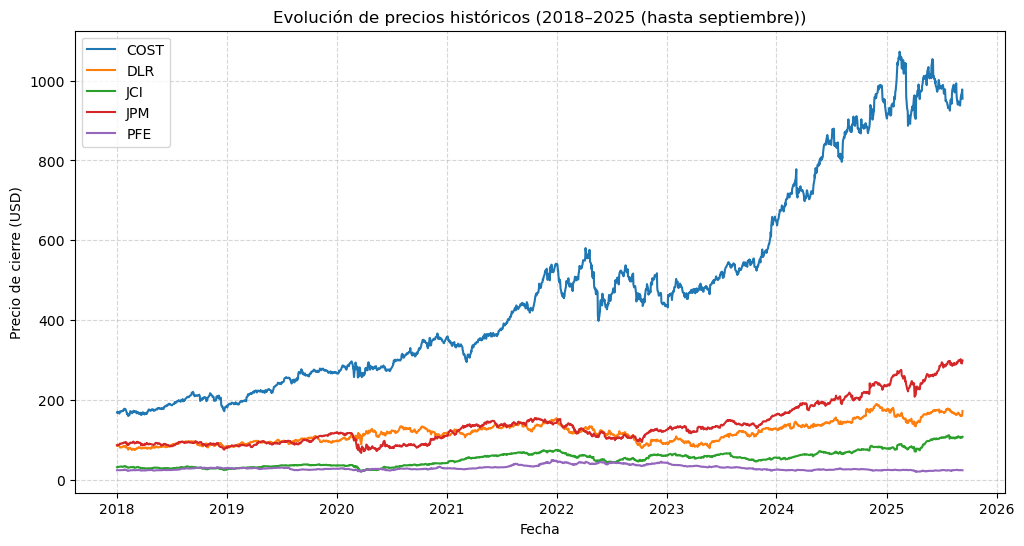

In [12]:
plt.figure(figsize=(12, 6))
for col in prices.columns:
    plt.plot(prices.index, prices[col], label=col)
plt.title('Evolución de precios históricos (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

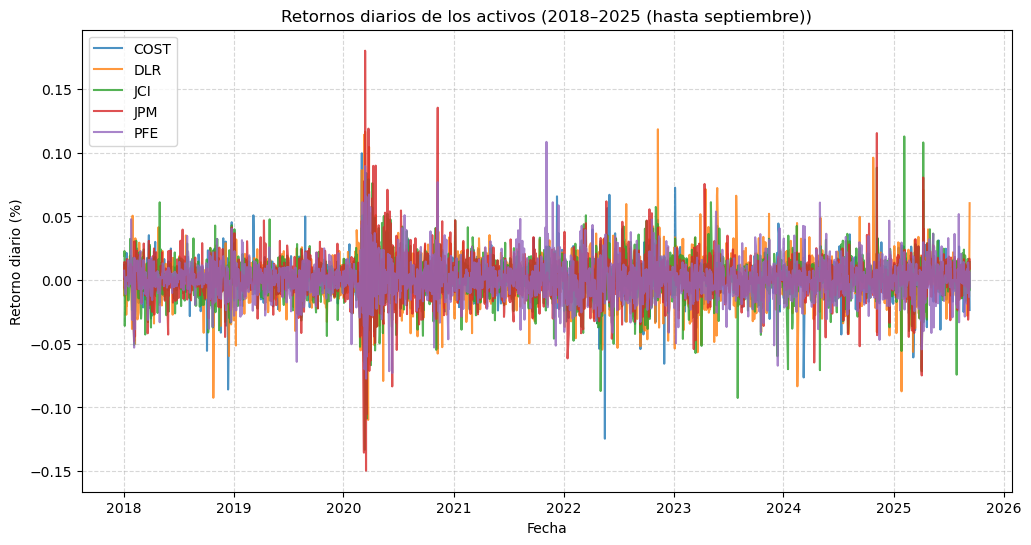

In [13]:
plt.figure(figsize=(12, 6))
for col in dailyreturns.columns:
    plt.plot(dailyreturns.index, dailyreturns[col], label=col, alpha=0.8)
plt.title('Retornos diarios de los activos (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

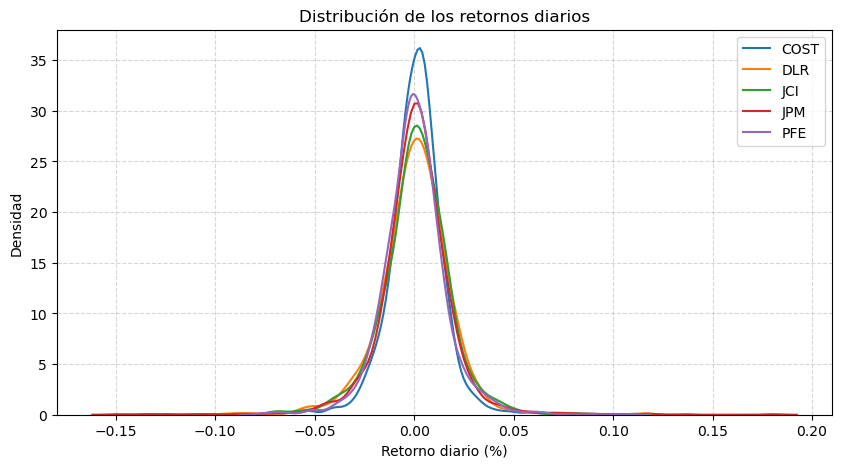

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 5))
for col in dailyreturns.columns:
    sns.kdeplot(dailyreturns[col], label=col)
plt.title('Distribución de los retornos diarios')
plt.xlabel('Retorno diario (%)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [15]:
# --- Umbral de 3 desviaciones estándar (por activo) ---
events = {}

for col in dailyreturns.columns:
    mu = dailyreturns[col].mean()
    sigma = dailyreturns[col].std()
    threshold = 3 * sigma
    extremes = dailyreturns[(dailyreturns[col] > mu + threshold) | (dailyreturns[col] < mu - threshold)][col]
    events[col] = extremes

# --- Mostrar resultados por activo ---
for col, vals in events.items():
    print(f"\n=== {col} ===")
    print(f"Total de eventos extremos: {len(vals)}")
    print(vals.sort_values().head())   # Peores 5 días
    print(vals.sort_values(ascending=False).head())  # Mejores 5 días



=== COST ===
Total de eventos extremos: 33
Date
2022-05-18   -0.124513
2018-12-14   -0.085868
2024-03-08   -0.076414
2022-12-01   -0.065628
2020-03-16   -0.063155
Name: COST, dtype: float64
Date
2020-03-02    0.099595
2020-03-17    0.084081
2020-03-13    0.080114
2023-01-06    0.072592
2022-06-02    0.067003
Name: COST, dtype: float64

=== DLR ===
Total de eventos extremos: 28
Date
2020-03-23   -0.109736
2020-03-16   -0.097807
2018-10-26   -0.092380
2020-03-19   -0.087884
2025-01-27   -0.087313
Name: DLR, dtype: float64
Date
2022-11-10    0.118447
2020-03-13    0.116617
2020-03-10    0.114195
2020-03-26    0.104587
2024-10-25    0.096167
Name: DLR, dtype: float64

=== JCI ===
Total de eventos extremos: 29
Date
2020-03-12   -0.133201
2020-03-18   -0.108703
2023-08-02   -0.092532
2022-05-04   -0.087062
2025-07-29   -0.074247
Name: JCI, dtype: float64
Date
2025-02-05    0.112822
2025-04-09    0.108097
2024-11-06    0.088298
2020-03-13    0.084270
2020-03-24    0.079149
Name: JCI, dtype: 

In [16]:
benchmark = yf.download('^GSPC', start='2018-01-01', end='2025-09-11')['Close']
benchmark

C:\Users\miche\AppData\Local\Temp\ipykernel_15152\139211519.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download('^GSPC', start='2018-01-01', end='2025-09-11')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2025-09-04,6502.080078
2025-09-05,6481.500000
2025-09-08,6495.149902


In [17]:
benchmark_dailyreturns = benchmark.pct_change().dropna()
benchmark_dailyreturns

Ticker,^GSPC
Date,
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662
2018-01-09,0.001303
...,...
2025-09-04,0.008346
2025-09-05,-0.003165
2025-09-08,0.002106


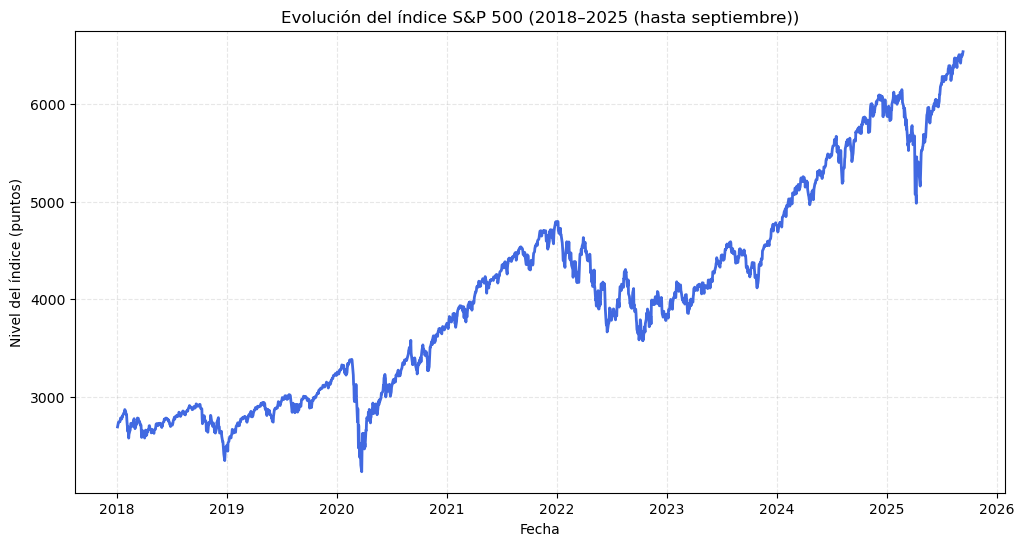

In [18]:
plt.figure(figsize=(12,6))
plt.plot(benchmark.index, benchmark, color='royalblue', linewidth=2)
plt.title('Evolución del índice S&P 500 (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Nivel del índice (puntos)')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [19]:
# trabajando con w iguales para despues optimizar dichos pesos
weights = np.repeat(1/len(tickers), len(tickers))
portfolio_returns = (dailyreturns * weights).sum(axis=1)

In [20]:
cum_portfolio = (1 + portfolio_returns).cumprod()
cum_benchmark = (1 + benchmark_dailyreturns).cumprod()

In [21]:
def performance_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annual_volatility = returns.std() * np.sqrt(252)

    total_return = float(total_return)
    annual_volatility = float(annual_volatility)
 
    return total_return, annual_volatility

port_ret, port_vol = performance_metrics(portfolio_returns)
bench_ret, bench_vol = performance_metrics(benchmark_dailyreturns)

metrics = pd.DataFrame({
    'Rendimiento acumulado': [port_ret, bench_ret],
    'Volatilidad anualizada': [port_vol, bench_vol]
}, index=['Portafolio', 'S&P 500'])

metrics = metrics.round(4)
display(metrics)

C:\Users\miche\AppData\Local\Temp\ipykernel_15152\2177658694.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_return = float(total_return)
C:\Users\miche\AppData\Local\Temp\ipykernel_15152\2177658694.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annual_volatility = float(annual_volatility)


,Rendimiento acumulado,Volatilidad anualizada
Portafolio,2.0808,0.1902
S&P 500,1.4230,0.1985


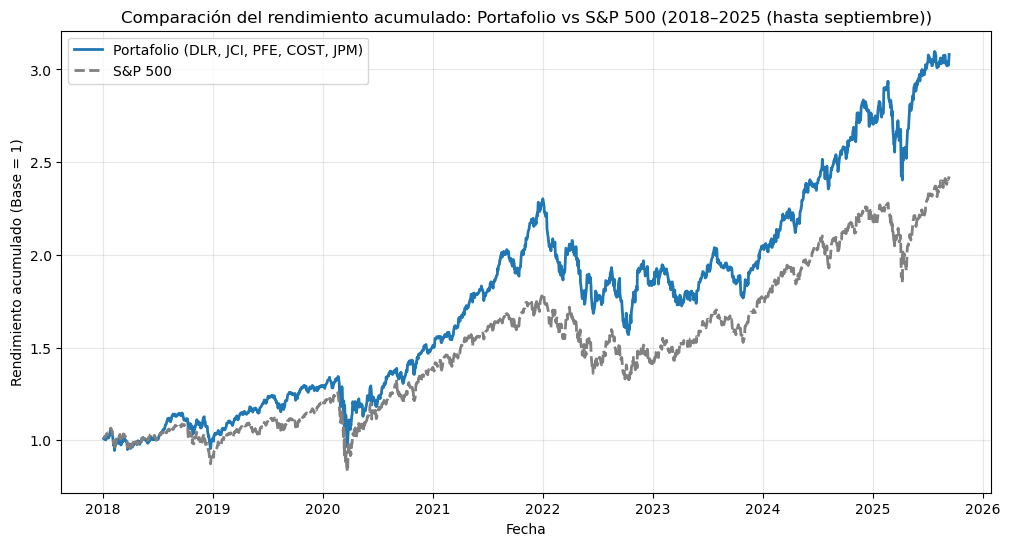

In [22]:
plt.figure(figsize=(12,6))
plt.plot(cum_portfolio.index, cum_portfolio, label='Portafolio (DLR, JCI, PFE, COST, JPM)', linewidth=2)
plt.plot(cum_benchmark.index, cum_benchmark, label='S&P 500', linestyle='--', color='gray', linewidth=2)
plt.title('Comparación del rendimiento acumulado: Portafolio vs S&P 500 (2018–2025 (hasta septiembre))')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento acumulado (Base = 1)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [23]:
# Calculo de drawdown máximo del portafolio

def max_drawdown(cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / rolling_max - 1
    return drawdown.min()

mdd_portfolio = max_drawdown(cum_portfolio)
mdd_benchmark = max_drawdown(cum_benchmark)

print("Max Drawdown - Portafolio:", mdd_portfolio)
print("Max Drawdown - S&P 500:", mdd_benchmark)




Max Drawdown - Portafolio: -0.3181267093738416
Max Drawdown - S&P 500: Ticker
^GSPC   -0.33925
dtype: float64


Significa que el portafolio tuvo una caída máxima ligeramente menor que el índice, lo cual indica mejor resistencia en periodos de pérdida severa (menor exposición al riesgo extremo o eventos de cola)

# Entrega 3

#### **Calculamos los rendimientos logarítmicos**

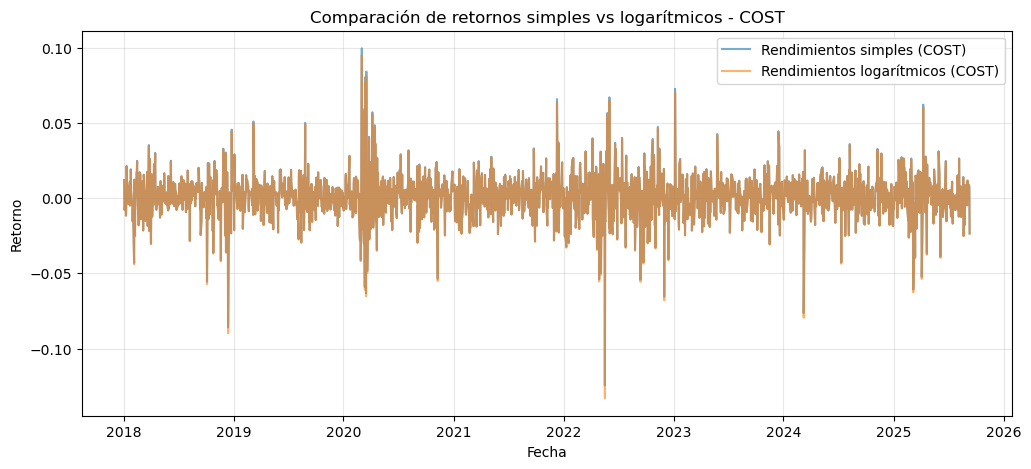

In [27]:

log_returns = np.log(prices / prices.shift(1)).dropna()
log_returns.head()

# Comparación entre rendimientos simples y logarítmicos
plt.figure(figsize=(12, 5))
plt.plot(dailyreturns.index, dailyreturns['COST'], label='Rendimientos simples (COST)', alpha=0.6)
plt.plot(log_returns.index, log_returns['COST'], label='Rendimientos logarítmicos (COST)', alpha=0.6)
plt.title('Comparación de retornos simples vs logarítmicos - COST')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### **Volatilidad anualizada**

In [29]:

import scipy.stats as stats

# Calculamos métricas descriptivas
stats_summary = pd.DataFrame({
    'Media diaria': log_returns.mean(),
    'Desviación estándar diaria': log_returns.std(),
    'Asimetría': log_returns.skew(),
    'Curtosis': log_returns.kurtosis(),
})

# Volatilidad anualizada (std diaria * sqrt(252))
stats_summary['Volatilidad anualizada'] = log_returns.std() * np.sqrt(252)

# Promedio anual (media diaria * 252)
stats_summary['Retorno esperado anual'] = log_returns.mean() * 252
stats_summary.round(4)


,Media diaria,Desviación estándar diaria,Asimetría,Curtosis,Volatilidad anualizada,Retorno esperado anual
Ticker,,,,,,
COST,0.0009,0.0145,-0.4920,8.8493,0.2297,0.2261
DLR,0.0004,0.0187,-0.1096,5.6420,0.2970,0.0909
JCI,0.0006,0.0183,-0.5706,5.9866,0.2907,0.1586
JPM,0.0006,0.0184,-0.0753,13.0901,0.2928,0.1615
PFE,-0.0000,0.0160,0.0630,3.8555,0.2536,-0.0005


C:\Users\miche\AppData\Local\Temp\ipykernel_15152\76739929.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stats_summary['Volatilidad anualizada'][i] + 0.002,
C:\Users\miche\AppData\Local\Temp\ipykernel_15152\76739929.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_summary['Retorno esperado anual'][i],


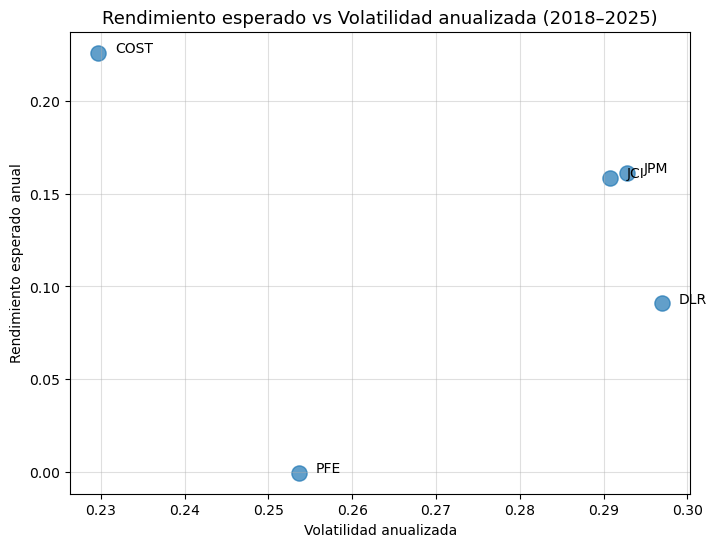

In [30]:

plt.figure(figsize=(8,6))
plt.scatter(stats_summary['Volatilidad anualizada'], 
            stats_summary['Retorno esperado anual'], 
            s=120, alpha=0.7)

# Etiquetas de cada punto (activo)
for i, txt in enumerate(stats_summary.index):
    plt.text(stats_summary['Volatilidad anualizada'][i] + 0.002,
             stats_summary['Retorno esperado anual'][i],
             txt, fontsize=10)

plt.title('Rendimiento esperado vs Volatilidad anualizada (2018–2025)', fontsize=13)
plt.xlabel('Volatilidad anualizada')
plt.ylabel('Rendimiento esperado anual')
plt.grid(alpha=0.4)
plt.show()


#### **Pruebas de normalidad (Jarque–Bera, Shapiro–Wilk, Kolmogorov–Smirnov)**

In [32]:
from scipy.stats import jarque_bera, shapiro, kstest, norm
import pandas as pd

# Usaremos los rendimientos logarítmicos como base
returns_df = log_returns  

normality_tests = pd.DataFrame(columns=['Jarque-Bera p', 'Shapiro p', 'KS p'])

for ticker in tickers:
    returns = returns_df[ticker].dropna()
    
    # Prueba Jarque–Bera (asimetría y curtosis)
    jb_p = jarque_bera(returns)[1]
    # Prueba Shapiro–Wilk (normalidad general)
    shapiro_p = shapiro(returns.sample(5000) if len(returns) > 5000 else returns)[1]
    # Prueba Kolmogorov–Smirnov comparando contra una normal teórica
    ks_p = kstest(returns, 'norm', args=(returns.mean(), returns.std()))[1]
    
    normality_tests.loc[ticker] = [jb_p, shapiro_p, ks_p]

# Mostrar resultados redondeados
normality_tests = normality_tests.astype(float).round(4)
display(normality_tests)

# Interpretación rápida
print("\nInterpretación general:")
print("Si p < 0.05 → se rechaza la normalidad.")
print("Si p ≥ 0.05 → no se rechaza la normalidad (se aproxima a normal).")


,Jarque-Bera p,Shapiro p,KS p
DLR,0.0,0.0,0.0
JCI,0.0,0.0,0.0
PFE,0.0,0.0,0.0
COST,0.0,0.0,0.0
JPM,0.0,0.0,0.0



Interpretación general:
Si p < 0.05 → se rechaza la normalidad.
Si p ≥ 0.05 → no se rechaza la normalidad (se aproxima a normal).


#### **Generamos QQ-Plots**

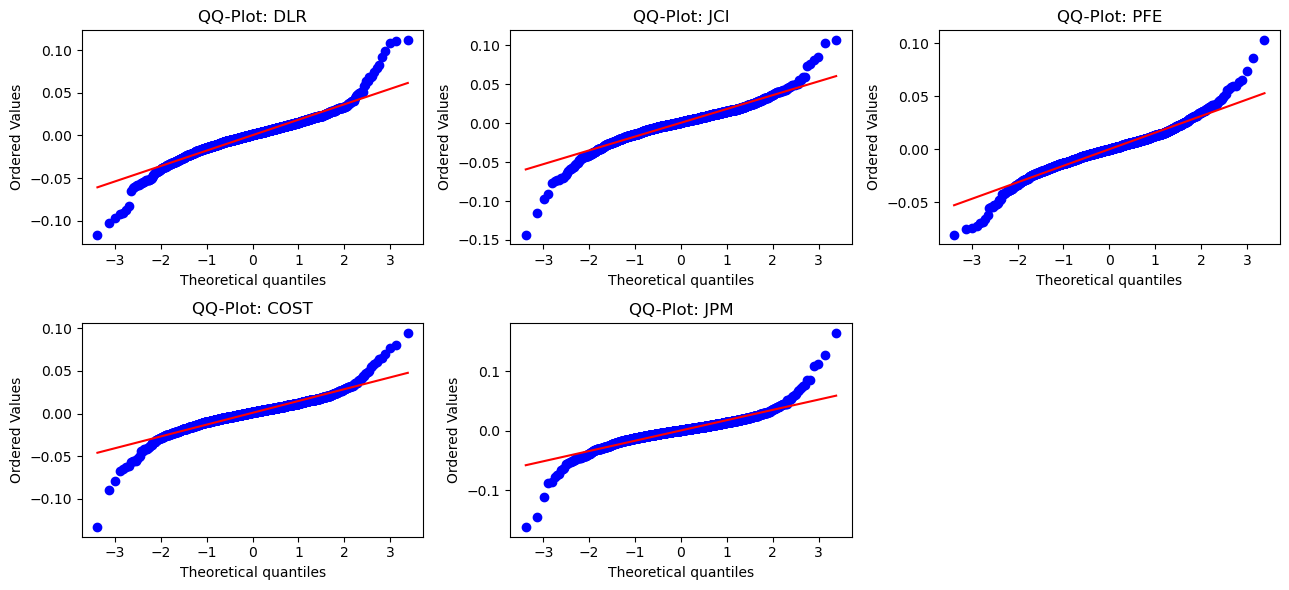

In [34]:

import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 3, i)
    stats.probplot(log_returns[ticker], dist="norm", plot=plt)
    plt.title(f"QQ-Plot: {ticker}")
plt.tight_layout()
plt.show()


#### **Modelado Teorico**


#### Ecuaciones del modelo

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

donde:

- ( mu ): rendimiento medio (drift)  
- ( sigma ): volatilidad del activo  
- ( Wt ): proceso de Wiener (movimiento browniano estándar)

**Integrando la ecuación:**

$$
S_t = S_0 \, e^{(\mu - 0.5\sigma^2)t + \sigma W_t}
$$

y, por lo tanto:

$$
\ln(S_t) = \ln(S_0) + (\mu - 0.5\sigma^2)t + \sigma W_t
$$

---

### **Supuestos del modelo**

1. Los rendimientos son log-normales y los retornos logarítmicos son normales.  
2. La volatilidad ( sigma ) y la media ( \mu ) son constantes en el tiempo.  
3. No hay saltos ni eventos extremos (movimiento continuo).  
4. No existen costos de transacción ni fricciones de mercado.  
5. Los precios solo pueden tomar valores positivos ( S_t > 0 ).

---

### **Limitaciones**

- En la práctica, los rendimientos financieros presentan **colas gru**


#### Simulación de un Movimiento Browniano Geométrico

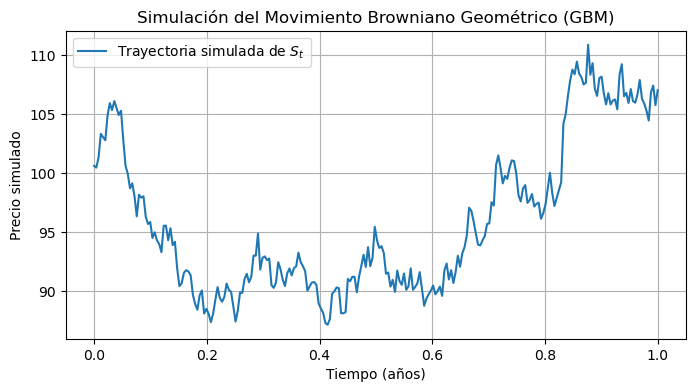

In [38]:

import numpy as np
import matplotlib.pyplot as plt



# Parámetros del ejemplo
mu = 0.10       # rendimiento anual esperado
sigma = 0.20    # volatilidad anual
S0 = 100        # precio inicial
T = 1           # horizonte (1 año)
N = 252         # pasos (días de trading)
dt = T / N

# Generar trayectoria del Wiener
np.random.seed(42)
W = np.random.standard_normal(N)
W = np.cumsum(W) * np.sqrt(dt)

# Generar precios simulados con GBM
t = np.linspace(0, T, N)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Graficar
plt.figure(figsize=(8,4))
plt.plot(t, S, label='Trayectoria simulada de $S_t$')
plt.title("Simulación del Movimiento Browniano Geométrico (GBM)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Precio simulado")
plt.legend()
plt.grid(True)
plt.show()


# Entrega 4

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_arch
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [77]:
opt_prices=yf.download(tickers, start='2018-01-01', end='2023-06-01', progress=False)['Close']

# Precios de Backtesting
bt_prices=yf.download(tickers, start='2023-06-01', end='2025-09-01', progress=False)['Close']

# Benchmark
benchmark=yf.download(['^GSPC'], start='2023-06-01', end='2025-09-01', progress=False)['Close']

# Get Optimization Returns 
opt_returns=opt_prices.pct_change().dropna()

C:\Users\miche\AppData\Local\Temp\ipykernel_15152\3167349584.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  opt_prices=yf.download(tickers, start='2018-01-01', end='2023-06-01', progress=False)['Close']
C:\Users\miche\AppData\Local\Temp\ipykernel_15152\3167349584.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bt_prices=yf.download(tickers, start='2023-06-01', end='2025-09-01', progress=False)['Close']
C:\Users\miche\AppData\Local\Temp\ipykernel_15152\3167349584.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark=yf.download(['^GSPC'], start='2023-06-01', end='2025-09-01', progress=False)['Close']


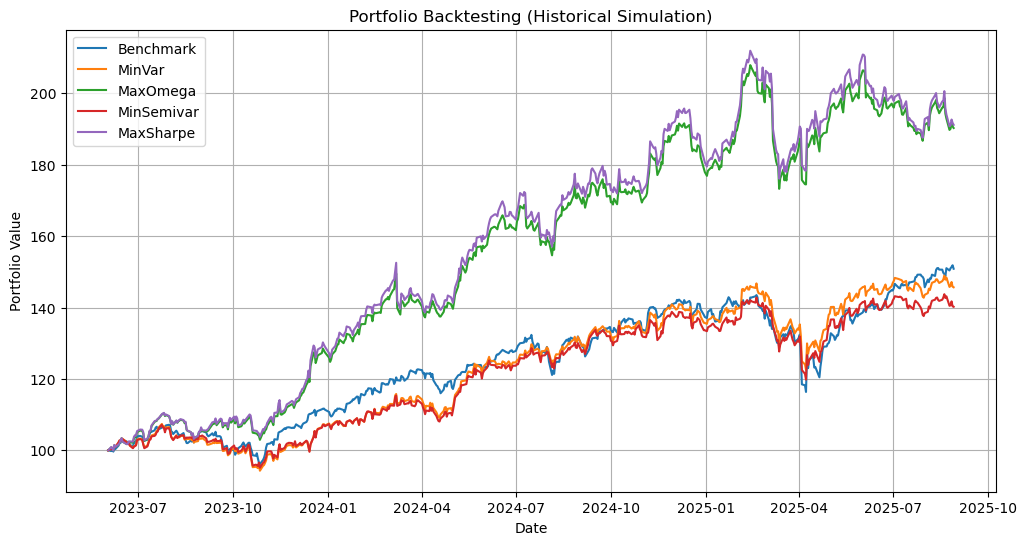

In [101]:
from scipy.optimize import minimize 

# Mínima Varianza
def opt_min_var(rets: pd.DataFrame):
    cov = rets.cov()
    n_assets = len(rets.columns)
    var = lambda w: w.T @ cov.values @ w
    w0 = np.ones(n_assets)/n_assets
    bounds = [(0,1)]*n_assets
    cons = {'fun': lambda w: np.sum(w)-1, 'type':'eq'}
    res = minimize(fun=var, x0=w0, bounds=bounds, constraints=cons, tol=1e-16)
    return res.x

# Máximo Sharpe
def opt_max_sharpe(rets: pd.DataFrame, rf_annual: float):
    E = rets.mean()
    cov = rets.cov()
    n_assets = len(rets.columns)
    rs = lambda w: -((w.T @ E.values - rf_annual/252) / np.sqrt(w.T @ cov.values @ w))
    w0 = np.ones(n_assets)/n_assets
    bounds = [(0,1)]*n_assets
    cons = {'fun': lambda w: np.sum(w)-1, 'type':'eq'}
    res = minimize(fun=rs, x0=w0, bounds=bounds, constraints=cons, tol=1e-16)
    return res.x

# Semivarianza 
def opt_min_semivar(rets: pd.DataFrame, threshold: float = 0.0):
    n_assets = len(rets.columns)
    def semivar_obj(w):
        port = rets.values @ w
        s = pd.Series(port - threshold)
        perd = s.where(s<0.0, 0.0)
        return perd.std(ddof=0)
    w0 = np.ones(n_assets)/n_assets
    bounds = [(0,1)]*n_assets
    cons = {'fun': lambda w: np.sum(w)-1, 'type':'eq'}
    res = minimize(fun=semivar_obj, x0=w0, bounds=bounds, constraints=cons, tol=1e-16)
    return res.x

# Omega
def opt_max_omega(rets: pd.DataFrame, threshold: float = 0.0):
    n_assets = len(rets.columns)
    eps = 1e-12
    def neg_omega(w):
        port = rets.values @ w
        s = pd.Series(port - threshold)
        up = s.where(s>0.0, 0.0).sum()
        dn = abs(s.where(s<0.0, 0.0).sum())
        return - up / max(dn, eps)
    w0 = np.ones(n_assets)/n_assets
    bounds = [(0,1)]*n_assets
    cons = {'fun': lambda w: np.sum(w)-1, 'type':'eq'}
    res = minimize(fun=neg_omega, x0=w0, bounds=bounds, constraints=cons, tol=1e-16)
    return res.x

# Backtesting estático
def static_backtesting(prices: pd.DataFrame, benchmark: pd.DataFrame, weights: dict, capital: float):
    rets = prices.pct_change().dropna()
    rets_benchmark = benchmark.pct_change().dropna()
    history = pd.DataFrame(index=rets.index)
    for strategy in weights.keys():
        if strategy=='Benchmark':
            temp = rets_benchmark + 1
            temp.iloc[0] = capital
            temp = temp.cumprod()
            history[strategy] = temp
        else:
            temp = np.sum(rets * weights.get(strategy), axis=1) + 1
            temp.iloc[0] = capital
            temp = temp.cumprod()
        history[strategy] = temp
    plt.figure(figsize=(12, 6))
    plt.plot(history, label=history.columns)
    plt.legend()
    plt.grid()
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Backtesting (Historical Simulation)')
    plt.show()
    return history

# Ejecución principal
rf = 0.0411 # (4.11% anual) tasa bonos U.S 10 años
# asumimos una tasa de 4.11% despues de invetigar el risk-free rate de un 10-year U.S. Treasury 
# (10 Year Treasury Rate - Real-Time & Historical Yield Trends. (2025, 7 noviembre). YCharts. https://ycharts.com/indicators/10_year_treasury_rate)
threshold = 0.0     # Umbral para semivarianza y Omega

w_minvar     = opt_min_var(opt_returns)
w_maxsharpe  = opt_max_sharpe(opt_returns, rf)
w_minsemivar = opt_min_semivar(opt_returns, threshold)
w_maxomega   = opt_max_omega(opt_returns, threshold)

weights = {
    "Benchmark": None,
    "MinVar":     w_minvar,
    "MaxOmega":   w_maxomega,
    "MinSemivar": w_minsemivar,
    "MaxSharpe":  w_maxsharpe,
}

history = static_backtesting(prices=bt_prices, benchmark=benchmark, weights=weights, capital=100.0)
plt.show()



In [103]:
history

,Benchmark,MinVar,MaxOmega,MinSemivar,MaxSharpe
Date,,,,,
2023-06-02,100.000000,100.000000,100.000000,100.000000,100.000000
2023-06-05,99.799642,100.402283,100.836454,100.496431,100.945930
2023-06-06,100.034560,100.259949,100.589631,100.304024,100.683124
2023-06-07,99.653227,100.466300,99.979762,100.366227,99.935136
2023-06-08,100.269945,101.319677,101.440457,101.298778,101.500837
...,...,...,...,...,...
2025-08-25,150.368129,145.759832,189.727028,140.474149,190.751758
2025-08-26,150.989750,146.043580,190.043111,140.614519,190.989760
2025-08-27,151.350764,147.139177,191.602865,141.720140,192.631542


In [124]:
# Función Métricas de Desempeño

def metrics (history , rf):
    # returns 
    rets = history.pct_change().dropna()
    # Cov 
    cov = rets.cov()
    # DataFrame
    df = pd.DataFrame(index=rets.columns)

    # Rendimientos
    df['Rendimiento'] =r_p= rets.mean()
    #volatilidad 
    df['Volatilidad'] =vol =rets.std()
    # Sharpe 
    df['Sharpe']= sharpe = (r_p - rf) /vol
    # Downside
    df['Downside']  = downside = rets[rets<0].std()
    # Upside 
    df['Upside'] = upside = rets[rets>0].std()
    # Omega
    df['Omega'] = omega = upside / downside
    # Beta
    cov_b = cov['Benchmark']
    var_b = cov_b['Benchmark']
    df['Beta'] = beta = cov_b / var_b

    #Alpha de Jensen 
    r_m = rets['Benchmark'].mean()
    df['Alpha'] = alpha = r_p - (rf + beta * (r_m - rf))

    # Sortino
    df['Sortino'] = (r_p -rf) /downside

    # Treynor
    df['Treynor'] = (r_p-rf)/beta

    return df.T

metrics_df = metrics(history, rf)
metrics_df

,Benchmark,MinVar,MaxOmega,MinSemivar,MaxSharpe
Rendimiento,7.794422e-04,0.000712,0.001211,0.000645,0.001226
Volatilidad,9.784829e-03,0.009262,0.011457,0.009363,0.012031
Sharpe,-4.120722e+00,-4.360695,-3.481731,-4.320670,-3.314227
Downside,7.476059e-03,0.006464,0.008584,0.006432,0.009033
Upside,7.164844e-03,0.005981,0.007356,0.005974,0.007694
Omega,9.583718e-01,0.925239,0.856886,0.928784,0.851805
Beta,1.000000e+00,0.685411,0.700581,0.660182,0.694567
Alpha,-1.734723e-18,-0.012752,-0.011641,-0.013836,-0.011869
Sortino,-5.393290e+00,-6.248043,-4.646916,-6.289658,-4.414367
Treynor,-4.032056e-02,-0.058925,-0.056937,-0.061278,-0.057408


**EXTRA:**

Decidimos agregar un pequeño análisis de estrategias a la composición de nuestro portafolio,con optimización y backtesting estático bajo diferentes estrategias (Mínima Varianza, Máximo Sharpe, Mínima Semivarianza y Máximo Omega). 

Con la finalidad de encontrar los pesos óptimos para un portafolio de activos y a la vez comparar su desempeño histórico frente a un benchmark (S&P500). Utilizando l método *scipy.optimize.minimize* para resolver un problema de optimización con restricciones y límites realistas. 
- Pesos entre 0 y 1 (no posiciones cortas).
- Suma total de pesos = 1 (100% invertido).

La gráfica obtenida muestra la evolución comparativa de las estrategias. En la cual observamos que MaxSharpe (maximiza el ratio de Sharpe) y MaxOmega (maximiza la proporción de rendimientos positivos sobre los negativos) superan al benchmark en rendimiento acumulado con un gran crecimiento. Sin embargo ambos demuestran mayor volatilidad que las demas estrategias, es decir para posiciones mas agresivas y con mayor tolerancia al riesgo.

Despues de analizar la estrategias evaluadas, nuestra elección sería **Max Omega** ya que mide la relación entre el upside risk (potencial de ganancias) y el downside risk (potencial de pérdidas). Ofreciendo un equilibrio entre rentabilidad y control de riesgo. Irnos por Max Sharpe si genera mayor rendimiento, pero significa adoptar una mayor volatilidad. Al fin al cabo ambos superan al S&P.

#### **Modelar la varianza (y volatilidad) del portafolio con modelos ARCH/GARCH** 

In [75]:
portfolio_returns.name= 'portfolio_returns'

=== Pruebas de Estacionariedad ===
ADF Statistic: -12.7308 | p-value: 0.0000
Valores críticos: {'1%': -3.4337622297208146, '5%': -2.863047304445204, '10%': -2.567572430319552}
KPSS Statistic: 0.1381 | p-value: 0.1000
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=== Pruebas de Heterocedasticidad ===


C:\Users\miche\AppData\Local\Temp\ipykernel_15152\945854519.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_pvalue, _, crit_vals_kpss = kpss(returns, regression='c', nlags='auto')


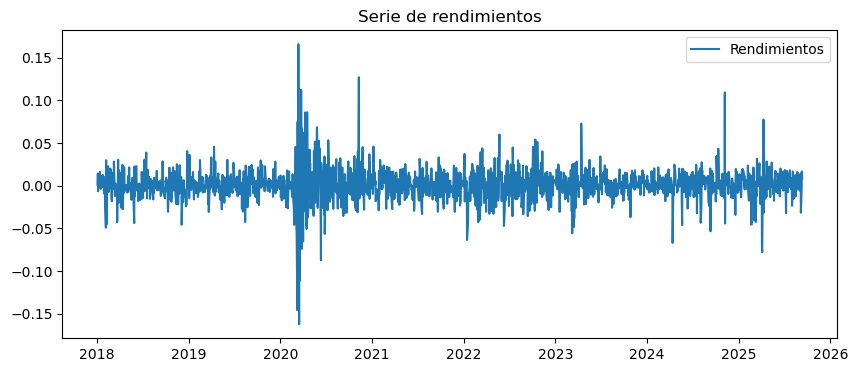

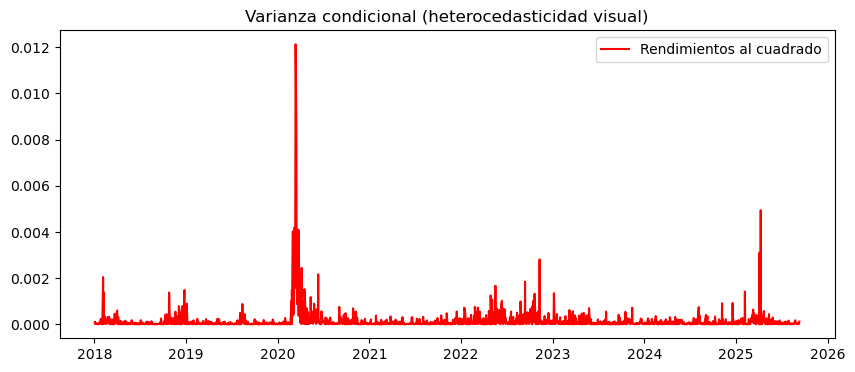

=== Test ARCH LM ===
LM Stat: 540.8384 | p-value: 0.0000
✅ Evidencia de heterocedasticidad.



In [151]:
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats
returns_sq = portfolio_returns**2

print("=== Pruebas de Estacionariedad ===")
# ADF
adf_stat, adf_pvalue, _, _, crit_vals, _ = adfuller(returns)
print(f"ADF Statistic: {adf_stat:.4f} | p-value: {adf_pvalue:.4f}")
print("Valores críticos:", crit_vals)
# KPSS
kpss_stat, kpss_pvalue, _, crit_vals_kpss = kpss(returns, regression='c', nlags='auto')
print(f"KPSS Statistic: {kpss_stat:.4f} | p-value: {kpss_pvalue:.4f}")
print("Valores críticos:", crit_vals_kpss)


print("=== Pruebas de Heterocedasticidad ===")
plt.figure(figsize=(10,4))
plt.plot(returns, label='Rendimientos')
plt.title('Serie de rendimientos')
plt.legend()
plt.show()
plt.figure(figsize=(10,4))
plt.plot(returns_sq, label='Rendimientos al cuadrado', color='red')
plt.title('Varianza condicional (heterocedasticidad visual)')
plt.legend()
plt.show()

from statsmodels.stats.diagnostic import het_arch
lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(returns)
print("=== Test ARCH LM ===")
print(f"LM Stat: {lm_stat:.4f} | p-value: {lm_pvalue:.4f}")
if lm_pvalue < 0.05:
    print("✅ Evidencia de heterocedasticidad.\n")
else:
    print("⚠️ No se detecta heterocedasticidad significativa.\n")

Las pruebas de estacionariedad y heterocedasticidad indican que los rendimientos del portafolio son estacionarios y se encuentra volatilidad presente variable en el tiempo.

In [270]:
from arch import arch_model

best_aic = np.inf
best_bic = np.inf
best_order = None
best_model = None

# Probar modelos ARCH(1) a ARCH(5)
for p in range(1, 5):  
    model = arch_model(portfolio_returns, mean='Constant', vol='ARCH', p=p)
    result = model.fit(disp='off')
    
    print(f"ARCH({p}) → AIC: {result.aic:.2f} | BIC: {result.bic:.2f}")
    
    # Seleccionar el modelo con menor AIC y BIC (puedes usar solo uno si prefieres)
    if (result.aic < best_aic) and (result.bic < best_bic):
        best_aic = result.aic
        best_bic = result.bic
        best_order = p
        best_model = result

print(f"\n✅ Mejor modelo según AIC y BIC: ARCH({best_order})")
print(f"AIC: {best_aic:.2f}, BIC: {best_bic:.2f}\n")
print(best_model.summary())


ARCH(1) → AIC: -12113.24 | BIC: -12096.54
ARCH(2) → AIC: -12204.81 | BIC: -12182.54
ARCH(3) → AIC: -12288.35 | BIC: -12260.52
ARCH(4) → AIC: -12333.12 | BIC: -12299.72

✅ Mejor modelo según AIC y BIC: ARCH(4)
AIC: -12333.12, BIC: -12299.72

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                6172.56
Distribution:                  Normal   AIC:                          -12333.1
Method:            Maximum Likelihood   BIC:                          -12299.7
                                        No. Observations:                 1932
Date:                Sun, Nov 09 2025   Df Residuals:                     1931
Time:                        22:22:46   Df Model:                            1
                                 Mean Model     

C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001435. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001435. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: Data

De acorde a los resultados y fijandonos solo en BIC, ya que estamos buscando identificar el mejor modelo real y el más simple. Podemos observar que el modelo ARCH(4) es el más adecuado para representar la volatilidad condicional del portafolio, al ofrecer un rendimiento casi idéntico con menor complejidad y mayor estabilidad. De igual manera cuanto menor (más negativo) sea el AIC, mejor ajuste tiene el modelo, y el valor más bajo corresponde al ARCH(4), lo que indica que este modelo ofrece el mejor ajuste a los datos entre las opciones evaluadas. 

El salto de mejora entre ARCH(3) y ARCH(4) aún es significativo, lo que justifica el uso del modelo de orden 4 y cumple con el principio de parsimonia.


=== Jarque–Bera Test ===
JB Stat: 184.6544 | p-value: 0.0000

=== Shapiro–Wilk Test ===
SW Stat: 0.9842 | p-value: 0.0000
⚠️ Los residuos no siguen distribución normal.



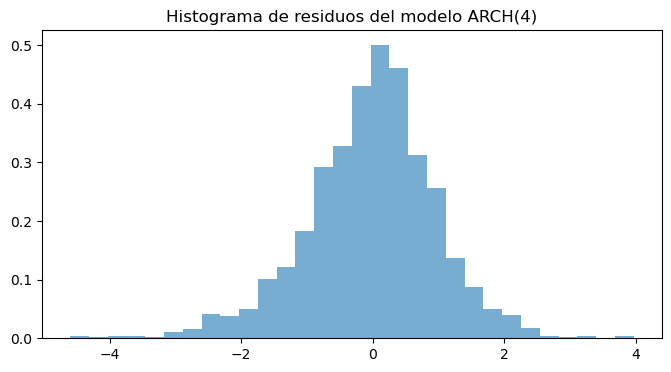

In [275]:
residuals = best_model.resid / best_model.conditional_volatility

# Jarque–Bera
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print("=== Jarque–Bera Test ===")
print(f"JB Stat: {jb_stat:.4f} | p-value: {jb_pvalue:.4f}")

# Shapiro–Wilk
sw_stat, sw_pvalue = stats.shapiro(residuals)
print("\n=== Shapiro–Wilk Test ===")
print(f"SW Stat: {sw_stat:.4f} | p-value: {sw_pvalue:.4f}")

if jb_pvalue > 0.05 and sw_pvalue > 0.05:
    print("✅ Los residuos siguen distribución normal.\n")
else:
    print("⚠️ Los residuos no siguen distribución normal.\n")

# Histograma de residuos
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, density=True, alpha=0.6)
plt.title(f"Histograma de residuos del modelo ARCH({best_order})")
plt.show()

In [276]:
residuals

Date
2018-01-03    0.796718
2018-01-04    0.269880
2018-01-05   -0.926971
2018-01-08    0.276517
2018-01-09   -0.715262
                ...   
2025-09-04    0.745960
2025-09-05   -0.475546
2025-09-08   -0.434866
2025-09-09    0.940052
2025-09-10    1.253638
Length: 1932, dtype: float64

In [279]:
# ARCH 4 (AIC-5455.65, BIC-5489.05)
am = arch_model(portfolio_returns*100, mean='constant', vol='ARCH', p=4)
res = am.fit(disp='off')

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2721.83
Distribution:                  Normal   AIC:                           5455.65
Method:            Maximum Likelihood   BIC:                           5489.05
                                        No. Observations:                 1932
Date:                Sun, Nov 09 2025   Df Residuals:                     1931
Time:                        22:23:36   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0945  1.981e-02      4.770  1.841e-06 [5.568e-02,  0.133]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4229  4.171e-02     10.138  3.747e-24   [  0.341,  0.505]
alpha[1]       0.2343  4.608e-02      5.085  3.672e-07   [  0.144,  0.325]
alpha[2]       0.1503  3.674e-02      4.090  4.322e-05 [7.824e-02,  0.222]
alpha[3]       0.1317  3.407e-02      3.866  1.108e-04 [6.493e-02,  0.198]
alpha[4]       0.1592  4.654e-02      3.421  6.250e-04 [6.798e-02,  0.250]
==========================================================================

Covariance estimator: robust
"""

In [280]:
best_aic = np.inf
best_bic = np.inf
best_order = None
best_model = None

# Probar modelos GARCH(p,q) con p,q = 1 a 2 (puedes ampliar si lo deseas)
for p in range(1, 3):
    for q in range(1, 3):
        model = arch_model(portfolio_returns, mean='Constant', vol='GARCH', p=p, q=q)
        result = model.fit(disp='off')
        
        print(f"GARCH({p},{q}) → AIC: {result.aic:.2f} | BIC: {result.bic:.2f}")
        
        # Seleccionar el mejor modelo según AIC y BIC
        if (result.aic < best_aic) and (result.bic < best_bic):
            best_aic = result.aic
            best_bic = result.bic
            best_order = (p, q)
            best_model = result

print(f"\n✅ Mejor modelo según AIC y BIC: GARCH{best_order}")
print(f"AIC: {best_aic:.2f}, BIC: {best_bic:.2f}\n")
print(best_model.summary())


C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001435. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001435. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: Data

GARCH(1,1) → AIC: -12399.82 | BIC: -12377.56
GARCH(1,2) → AIC: -12388.15 | BIC: -12360.32
GARCH(2,1) → AIC: -12380.98 | BIC: -12353.14
GARCH(2,2) → AIC: -12386.88 | BIC: -12353.48

✅ Mejor modelo según AIC y BIC: GARCH(1, 1)
AIC: -12399.82, BIC: -12377.56

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6203.91
Distribution:                  Normal   AIC:                          -12399.8
Method:            Maximum Likelihood   BIC:                          -12377.6
                                        No. Observations:                 1932
Date:                Sun, Nov 09 2025   Df Residuals:                     1931
Time:                        22:23:37   Df Model:                            1
                                

El modelo GARCH(1,1) resultó ser el más eficiente, mostrando el menor AIC y una buena capacidad para representar la volatilidad condicional. Según el principio de parsimonia se prefiere el modelo más simple que capture adecuadamente la dinámica de la volatilidad. Aunque otros modelos (como GARCH(2,2)) tienen un ajuste similar, agregan complejidad sin mejora significativa.

El AIC más bajo indica mejor capacidad explicativa con penalización por complejidad.En este caso, el GARCH(1,1) presenta el menor AIC (-12399.82). El BIC penaliza aún más los modelos complejos (más parámetros). De igual manera, el menor BIC (-12377.56) también corresponde al GARCH(1,1), indicando que es el más eficiente en términos de parsimonia como ya mencionabamos antes.

=== Jarque–Bera Test ===
JB Stat: 184.6544 | p-value: 0.0000

=== Shapiro–Wilk Test ===
SW Stat: 0.9842 | p-value: 0.0000
⚠️ Los residuos no siguen distribución normal.



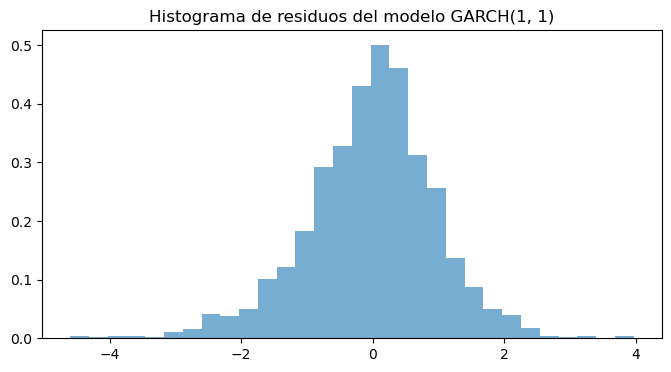

In [266]:
# Jarque–Bera
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print("=== Jarque–Bera Test ===")
print(f"JB Stat: {jb_stat:.4f} | p-value: {jb_pvalue:.4f}")

# Shapiro–Wilk
sw_stat, sw_pvalue = stats.shapiro(residuals)
print("\n=== Shapiro–Wilk Test ===")
print(f"SW Stat: {sw_stat:.4f} | p-value: {sw_pvalue:.4f}")

if jb_pvalue > 0.05 and sw_pvalue > 0.05:
    print("✅ Los residuos siguen distribución normal.\n")
else:
    print("⚠️ Los residuos no siguen distribución normal.\n")


plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, density=True, alpha=0.6)
plt.title(f"Histograma de residuos del modelo GARCH{best_order}")
plt.show()

In [91]:
# GARCH (1,1)
am = arch_model(portfolio_returns*100, mean='constant', vol='GARCH', p=1, q=1)
res = am.fit(disp='off')

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:      portfolio_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2687.61
Distribution:                  Normal   AIC:                           5383.23
Method:            Maximum Likelihood   BIC:                           5405.49
                                        No. Observations:                 1932
Date:                Thu, Nov 06 2025   Df Residuals:                     1931
Time:                        20:39:02   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0948  1.928e-02      4.916  8.840e-07 [5.698e-02,  0.133]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0460  1.412e-02      3.259  1.119e-03 [1.834e-02,7.371e-02]
alpha[1]       0.1450  2.775e-02      5.223  1.758e-07   [9.056e-02,  0.199]
beta[1]        0.8182  3.368e-02     24.296 2.149e-130     [  0.752,  0.884]
============================================================================

Covariance estimator: robust
"""

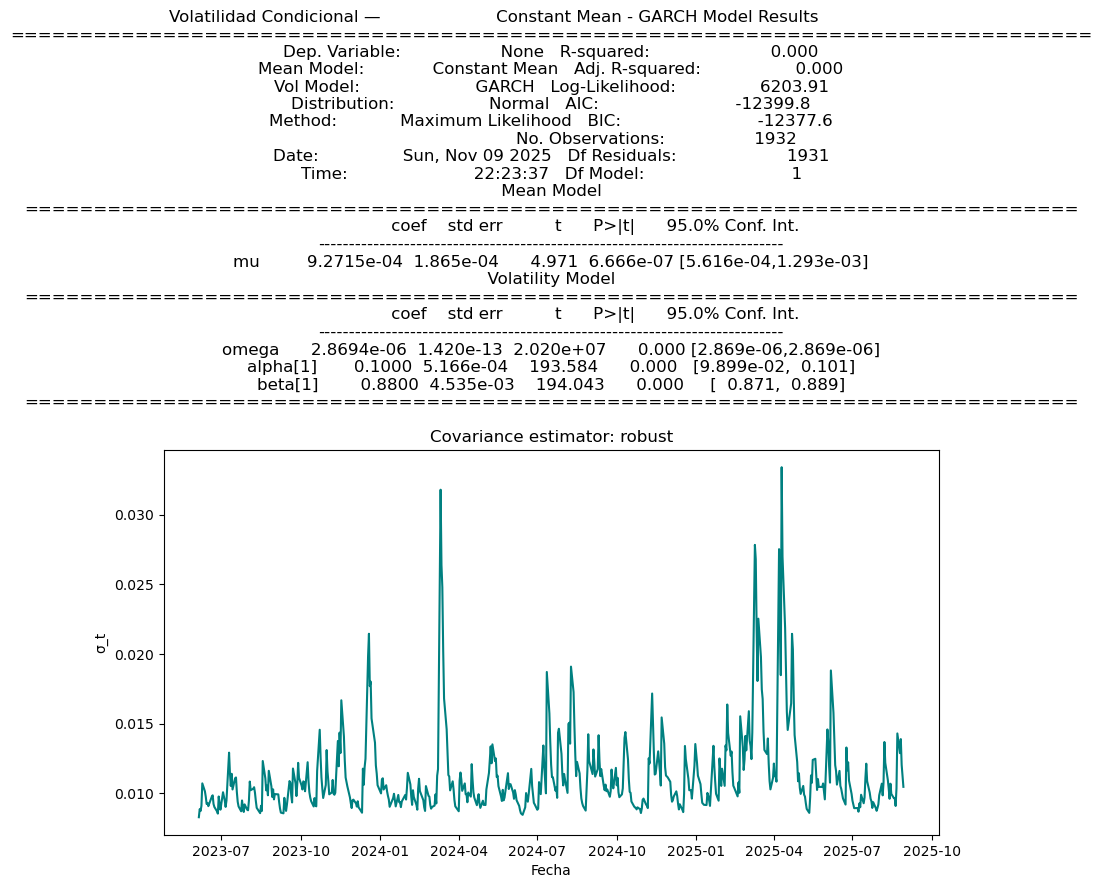

In [286]:
plt.figure(figsize=(10,5))
plt.plot(best_fit.conditional_volatility, color='teal')
plt.title(f'Volatilidad Condicional — {best_model}')
plt.ylabel('σ_t')
plt.xlabel('Fecha')
plt.show()


#### **Selección del mejor modelo por criterios** 

C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000131. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000131. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\miche\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataSc


📊 Criterios de selección (AIC/BIC):
                     AIC          BIC
ARCH(1)    -3434.294876 -3421.300371
ARCH(2)    -3434.434174 -3417.108167
GARCH(1,1) -3465.865994 -3448.539987
GARCH(2,1) -3462.842754 -3441.185245
GARCH(1,2) -3463.865996 -3442.208487

✅ Mejor modelo según BIC: GARCH(1,1)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               MaxOmega   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1736.93
Distribution:                  Normal   AIC:                          -3465.87
Method:            Maximum Likelihood   BIC:                          -3448.54
                                        No. Observations:                  562
Date:                Sun, Nov 09 2025   Df Residuals:                      561
Time:                        22:31:48   Df Model:                     

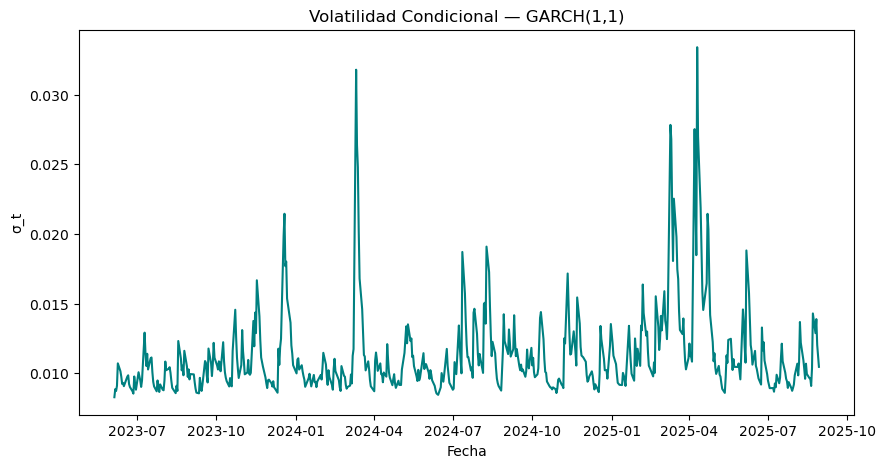

In [302]:
models = {
    'ARCH(1)': arch_model(rets, vol='ARCH', p=1, dist='normal'),
    'ARCH(2)': arch_model(rets, vol='ARCH', p=2, dist='normal'),
    'GARCH(1,1)': arch_model(rets, vol='GARCH', p=1, q=1, dist='normal'),
    'GARCH(2,1)': arch_model(rets, vol='GARCH', p=2, q=1, dist='normal'),
    'GARCH(1,2)': arch_model(rets, vol='GARCH', p=1, q=2, dist='normal'),
}

results = {}
for name, model in models.items():
    res = model.fit(disp='off')
    results[name] = {'AIC': res.aic, 'BIC': res.bic, 'Model': res}


results_df = pd.DataFrame(results).T[['AIC','BIC']]
best_model = results_df['BIC'].idxmin()  # Puedes cambiar a 'AIC' si prefieres
print("\n📊 Criterios de selección (AIC/BIC):\n", results_df)
print(f"\n✅ Mejor modelo según BIC: {best_model}")


best_fit = results[best_model]['Model']
print(best_fit.summary())


resid = best_fit.resid / best_fit.conditional_volatility
jb_test = jarque_bera(resid)
sw_test = shapiro(resid)

print(f"\n📈 Test de Normalidad de Residuos:")
print(f"Jarque–Bera p-value: {jb_test.pvalue:.4f}")
print(f"Shapiro–Wilk p-value: {sw_test.pvalue:.4f}")

plt.figure(figsize=(10,5))
plt.plot(best_fit.conditional_volatility, color='teal')
plt.title(f'Volatilidad Condicional — {best_model}')
plt.ylabel('σ_t')
plt.xlabel('Fecha')
plt.show()


Nuevamente podemos confirmar que el mejor modelo para nuestro portafolio es GARCH (1,1), ya que Ambos valores (AIC y BIC) son significativamente menores lo cual indica que tiene mejor ajuste a los datos y menor pérdida de información, incluso penalizando su mayor número de parámetros.
Y a diferencia de ARCH, el GARCH incluye además un término autorregresivo de la varianza pasada, lo que permite modelar la persistencia de la volatilidad. Incluso al ser algo más complejo, mantiene la parsimonia y logra un balance óptimo entre ajuste y simplicidad.

#### **Calcular el VaR del portafolio basado en la varianza modelada** 

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1) Parametrico (1-day) VaR - volatilidad condicional 

def var_parametric_1day_from_fit(fit, portfolio_returns, alpha=0.05, capital=100_000):

    # volatilidad condicional alineada con rets_portfolio
    sigma_t = fit.conditional_volatility
    # si el fit tiene más observaciones (ej start param), alineamos:
    sigma_t = sigma_t.reindex(portfolio_returns.index).ffill()

    # media condicional (si el modelo tiene mean) - si no, us ar media histórica pequeña
    if hasattr(fit, 'params') and 'mu' in fit.params.index:
        mu_t = np.repeat(fit.params['mu'] / 1.0, len(sigma_t))  # si el mean es constante
        mu_t = pd.Series(mu_t, index=sigma_t.index)
    else:
        mu_t = pd.Series(portfolio_returns.mean(), index=sigma_t.index)

    z = norm.ppf(alpha)  # negativo para alpha<0.5
    # VaR (retorno) - convención: VaR positivo = pérdida esperada
    var_ret = -(mu_t + z * sigma_t)      # negativa de la cola izquierda

    # Convertir a unidades monetarias
    var_money = var_ret * capital

    df = pd.DataFrame({
        'sigma_t': sigma_t,
        'mu_t': mu_t,
        'VaR_ret': var_ret,
        'VaR_money': var_money,
    }).dropna()

    return df


In [290]:
var_parametric_1day_from_fit(best_fit, portfolio_returns, alpha=0.05, capital=100_000)

,sigma_t,mu_t,VaR_ret,VaR_money
Date,,,,
2023-06-05,0.008272,0.001076,0.012530,1253.022122
2023-06-06,0.008854,0.001076,0.013487,1348.747691
2023-06-07,0.008720,0.001076,0.013268,1326.752745
2023-06-08,0.009093,0.001076,0.013880,1388.028738
2023-06-09,0.010704,0.001076,0.016530,1653.008578
...,...,...,...,...
2025-09-04,0.010453,0.001076,0.016117,1611.693765
2025-09-05,0.010453,0.001076,0.016117,1611.693765
2025-09-08,0.010453,0.001076,0.016117,1611.693765


In [298]:
# VaR para n diás (horizon)
def var_forecast_ndays(fit, rets_portfolio, horizon, alpha, capital):
    
    # forecast produce un objeto con .variance and .mean (index: last_known_date)
    f = fit.forecast(horizon=horizon, reindex=False)  # reindex True/False según versión
    
    try:
        # algunas versiones devuelven DataFrame con columnas = [1..horizon]
        var_fore = f.variance.iloc[-1].values  # var forecasts for 1..h
        mean_fore = f.mean.iloc[-1].values
    except Exception:
        # alternativa: usar .variance.values
        var_fore = f.variance.values[-1].flatten()
        mean_fore = f.mean.values[-1].flatten()

    # Agregar varianzas para horizonte h (aproximación)
    sigma_h = np.sqrt(var_fore.sum())
    mu_h = mean_fore.sum()  # media acumulada esperada

    z = norm.ppf(alpha)
    # VaR para el horizonte h
    var_ret_h = -(mu_h + z * sigma_h)


    return {
        'horizon': horizon,
        'sigma_h': sigma_h,
        'mu_h': mu_h,
        'VaR_ret_h': var_ret_h,
        'VaR_money_h': var_ret_h * capital,
    }

In [308]:
var_forecast_ndays(best_fit, portfolio_returns, horizon=5, alpha=0.05, capital=100_000)


{'horizon': 5,
 'sigma_h': 0.023443234323521682,
 'mu_h': 0.0053820817243228946,
 'VaR_ret_h': 0.033178607280195,
 'VaR_money_h': 3317.8607280194997}

La interpretación del VaR a 5 días (95%) con la volatilidad de nuestro modelo GARCH(1,1). se puede deducir una expectativa de rendimiento acumulada μₕ ≈ 0.54% y una volatilidad acumulada para cinco días de σₕ ≈ 2.34%, lo que da como resultado un VaR(95%, 5 días) ≈ 3.32% ≈ (3,318 sobre un capital de $100k) en el 5% peor de los escenarios.

In [313]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def var_backtest_plot(rets_portfolio, fit, alpha, capital):
    # Forecast de la varianza condicional (1 día adelante)
    forecasts = fit.forecast(start=0, reindex=False)
    sigma2 = forecasts.variance.values.flatten()
    mu = forecasts.mean.values.flatten()

    # Alinear tamaño
    sigma2 = sigma2[:len(rets_portfolio)]
    mu = mu[:len(rets_portfolio)]
    rets = rets_portfolio.iloc[-len(sigma2):]

    # Calcular VaR diario
    z = norm.ppf(alpha)
    var_daily = -(mu + z * np.sqrt(sigma2))  # retorno VaR
    losses = -rets.values  # pérdidas reales

    # Convertir a unidades monetarias (opcional)
    var_money = var_daily * capital
    loss_money = losses * capital

    # Detectar violaciones
    breaches = losses > var_daily

    # Gráfico
    plt.figure(figsize=(12,6))
    plt.plot(rets.index[-len(var_daily):], loss_money, label="Pérdidas reales", color="gray")
    plt.plot(rets.index[-len(var_daily):], var_money, label=f"VaR (α={alpha})", color="red")
    plt.scatter(rets.index[-len(var_daily):][breaches], loss_money[breaches],
                color="orange", label="Excedencias", s=50, zorder=3)
    
    plt.title("Backtesting del VaR (Modelo GARCH(1,1))")
    plt.xlabel("Fecha")
    plt.ylabel("Pérdida diaria (en unidades de capital)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Total de excedencias: {breaches.sum()} de {len(breaches)} ({100*breaches.sum()/len(breaches):.2f}%)")

    return breaches


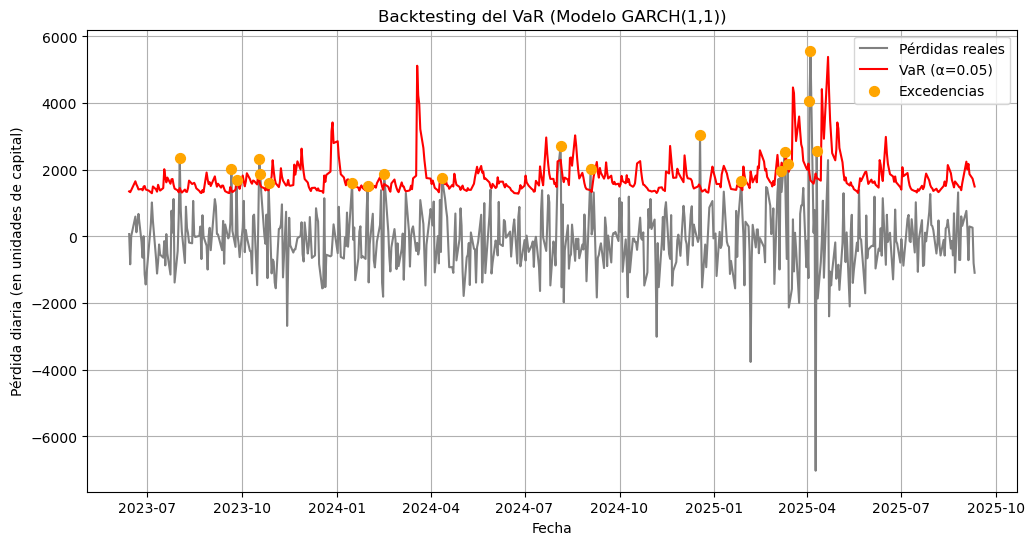

Total de excedencias: 20 de 562 (3.56%)


In [315]:
breaches = var_backtest_plot(portfolio_returns, best_fit, alpha=0.05, capital=100_000)

Gráfico comparando el VaR histórico vs. pérdidas reales para backtesting. 
Las pérdidas diarias fluctúan alrededor de cero, con algunos picos negativos (grandes pérdidas). 
El VaR (línea roja) actúa como una “barrera” de riesgo: solo un 5% de las pérdidas deberían superarla. 
Las excedencias se observan alrededor de 15 a 20 puntos por encima del VaR, dispersos a lo largo del periodo. 